In [ ]:
K-nearest neighbour, is most easy and it is also called lazy learner algorithm

# why most easy?

In [ ]:
e.g: if we have classfication dataset, and is m output kuch blue th or kuch red th, ab new any vala 
data point dekha jay ga k blue m jay ga ya red m, to ab us data point ki value ki base pr jab graph m plot 
kia jay ga to us ka "k" number of neibhours k saath distance nikala jay ga or un K neibhours m phir dekhy ga
k kitny blue ay or kitny red, agar 3 blue ay and 2 red ay for K=5, to vo data point blue m jay ga

# why so slow?

In [ ]:
ab vo jo data point graph m ya h , vo data point graph m mojood sab points k saath differenec nikaly ga, 
phir un sab differences ki values ko sort kry ga, then if k=5 to us m s top 5 shortest 
distance valy data points nikaly ga , phir check kry ga k kitny red hn or kitny blue agar blue ziada huy
to blue m jay ga otherwise red m, ab in distance nikalny m der lgti is liye it is slow process. 

# how to calculate distance?

In [ ]:
it can be EUCLIDEAN distance or MANHATTAN distance, dono formula lga kr dekhyn gy , jis s accuracy achi
ai us ko pick kr len gy

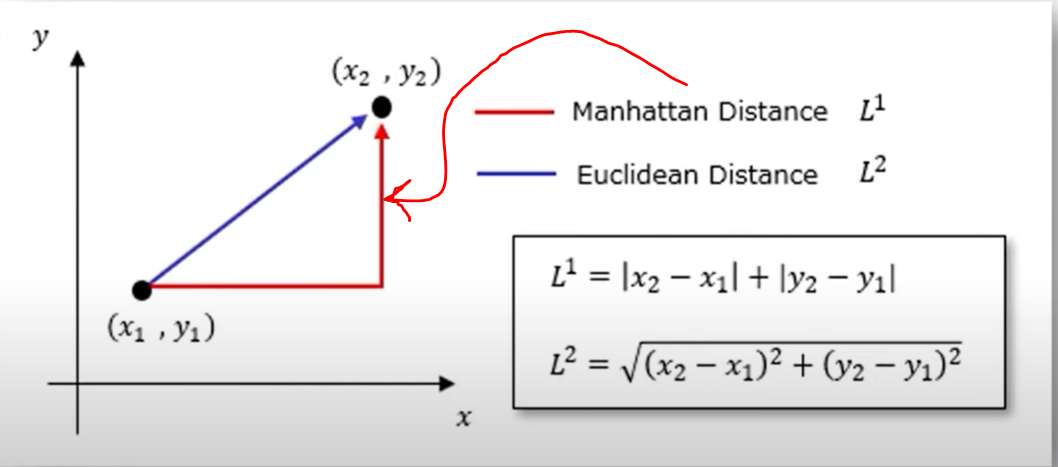

In [1]:
from IPython.display import Image
Image(filename='distance.png', width=300, height=300)
# manhattan distance is big path ko follow krta h 

# how to decide value of k?

In [ ]:
it totally depend on dataset, bar bar k ki value change kr kr k accuarcy check ki jati, but ideal cases 
m ki value 5 hi rkhi jati h

# practice

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset=dataset.drop(columns=['User ID','Gender'], axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [31]:
x=dataset.drop(columns=['Purchased'], axis=1)
y=dataset['Purchased']

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)

StandardScaler()

In [33]:
x=pd.DataFrame(ss.transform(x), columns=x.columns)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
# When p = 1, this is equivalent
# to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
# be default, k value is 5, you can change to get good score

In [53]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [54]:
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100
# model m thori ci overfitting consider ki ja sklti h for k=5
# is liye hm n k=6 rkh kr dekha

(90.9375, 90.0)

In [56]:
# you can also use loop to get which k value will give good score
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print('value of k is',i)
    print("training score is ",knn.score(x_train, y_train)*100)
    print("testing score is ", knn.score(x_test, y_test)*100)
    print('\n')

# k=6 is giving us good results

value of k is 1
training score is  99.6875
testing score is  85.0


value of k is 2
training score is  91.5625
testing score is  86.25


value of k is 3
training score is  92.5
testing score is  91.25


value of k is 4
training score is  91.875
testing score is  92.5


value of k is 5
training score is  90.9375
testing score is  92.5


value of k is 6
training score is  90.9375
testing score is  90.0


value of k is 7
training score is  91.875
testing score is  93.75


value of k is 8
training score is  90.625
testing score is  92.5


value of k is 9
training score is  91.25
testing score is  93.75




C:\Users\J11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


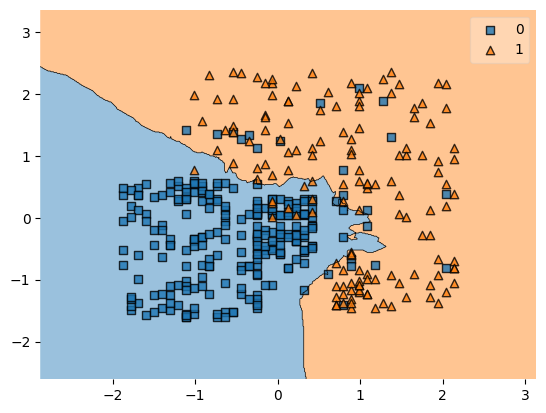

In [62]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()